In [1]:
import numpy as np

In [156]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import regex 

In [3]:
df=pd.read_csv("core-data-test_rating.csv")
df2=pd.read_csv("core-data_recipe.csv")

In [4]:
df

,user_id,recipe_id,rating,dateLastModified
0,5215572,55090,5,2015-01-09T18:05:22.95\n
1,5215572,26317,4,2016-12-04T17:50:35.777\n
2,5215572,15125,5,2014-02-12T13:51:37.007\n
3,3622615,26317,5,2013-06-14T17:39:06.547\n
4,1313770,55641,5,2015-06-24T19:07:02.493\n
...,...,...,...,...
283435,3023108,6807,3,2016-01-16T16:00:55.59\n
283436,3023108,20156,5,2015-12-22T14:30:32.307\n
283437,3023108,13087,4,2015-02-15T08:26:54.59\n
283438,3023108,241398,4,2016-03-29T17:35:49.05\n


In [5]:
df2

,recipe_id,recipe_name,image_url,ingredients,cooking_directions,nutritions
0,240488,"Pork Loin, Apples, and Sauerkraut",https://images.media-allrecipes.com/userphotos...,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name..."
1,218939,Foolproof Rosemary Chicken Wings,https://images.media-allrecipes.com/userphotos...,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'..."
2,87211,Chicken Pesto Paninis,https://images.media-allrecipes.com/userphotos...,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'..."
3,245714,Potato Bacon Pizza,https://images.media-allrecipes.com/userphotos...,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'..."
4,218545,Latin-Inspired Spicy Cream Chicken Stew,https://images.media-allrecipes.com/userphotos...,skinless boneless chicken breast halves^diced ...,{'directions': u'Prep\n10 m\nCook\n8 h 15 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name..."
...,...,...,...,...,...,...
45625,222886,Grateful Dead Cocktail,https://images.media-allrecipes.com/userphotos...,fluid ounce tequila^fluid ounce vodka^fluid ou...,{'directions': u'Prep\n5 m\nReady In\n5 m\nCom...,"{u'niacin': {u'hasCompleteData': False, u'name..."
45626,25650,Cheese Filling For Pastries,https://images.media-allrecipes.com/userphotos...,raisins^brandy^cream cheese^white sugar^all-pu...,{'directions': u'Prep\n15 m\nReady In\n15 m\nS...,"{u'niacin': {u'hasCompleteData': True, u'name'..."
45627,23544,Peach Smoothie,https://images.media-allrecipes.com/userphotos...,sliced peaches drained^scoops vanilla ice crea...,{'directions': u'Prep\n1 m\nReady In\n1 m\nIn ...,"{u'niacin': {u'hasCompleteData': False, u'name..."
45628,170710,Double Dare Peaches,https://images.media-allrecipes.com/userphotos...,butter^habanero peppers^fresh peaches^brown su...,{'directions': u'Prep\n20 m\nCook\n10 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'..."


In [6]:
ck=df2[["recipe_name","ingredients","cooking_directions"]]


In [238]:
df3=df2.loc[df2.cooking_directions.str.contains('Prep',na=False)]
df3

,recipe_id,recipe_name,image_url,ingredients,cooking_directions,nutritions
0,240488,"Pork Loin, Apples, and Sauerkraut",https://images.media-allrecipes.com/userphotos...,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name..."
1,218939,Foolproof Rosemary Chicken Wings,https://images.media-allrecipes.com/userphotos...,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'..."
2,87211,Chicken Pesto Paninis,https://images.media-allrecipes.com/userphotos...,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'..."
3,245714,Potato Bacon Pizza,https://images.media-allrecipes.com/userphotos...,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'..."
4,218545,Latin-Inspired Spicy Cream Chicken Stew,https://images.media-allrecipes.com/userphotos...,skinless boneless chicken breast halves^diced ...,{'directions': u'Prep\n10 m\nCook\n8 h 15 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name..."
...,...,...,...,...,...,...
45625,222886,Grateful Dead Cocktail,https://images.media-allrecipes.com/userphotos...,fluid ounce tequila^fluid ounce vodka^fluid ou...,{'directions': u'Prep\n5 m\nReady In\n5 m\nCom...,"{u'niacin': {u'hasCompleteData': False, u'name..."
45626,25650,Cheese Filling For Pastries,https://images.media-allrecipes.com/userphotos...,raisins^brandy^cream cheese^white sugar^all-pu...,{'directions': u'Prep\n15 m\nReady In\n15 m\nS...,"{u'niacin': {u'hasCompleteData': True, u'name'..."
45627,23544,Peach Smoothie,https://images.media-allrecipes.com/userphotos...,sliced peaches drained^scoops vanilla ice crea...,{'directions': u'Prep\n1 m\nReady In\n1 m\nIn ...,"{u'niacin': {u'hasCompleteData': False, u'name..."
45628,170710,Double Dare Peaches,https://images.media-allrecipes.com/userphotos...,butter^habanero peppers^fresh peaches^brown su...,{'directions': u'Prep\n20 m\nCook\n10 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'..."


In [239]:
#transform the cooking_directions into a list
df3['cooking_directions'] = df3.cooking_directions.apply(lambda x: x[1:-1].split('\\n'))

/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/1503654671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cooking_directions'] = df3.cooking_directions.apply(lambda x: x[1:-1].split('\\n'))


In [9]:
ck['ingredients'] = ck.ingredients.apply(lambda x: x[1:-1].split('^'))

/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/1049473734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ck['ingredients'] = ck.ingredients.apply(lambda x: x[1:-1].split('^'))


In [10]:
ck['ingredients']

0        [auerkraut drained, Granny Smith apples sliced...
1        [hicken wings, sprigs rosemary, head garlic, o...
2        [ocaccia bread quartered, prepared basil pesto...
3        [ed potatoes, strips bacon, Sauce:, heavy whip...
4        [kinless boneless chicken breast halves, diced...
                               ...                        
45625    [luid ounce tequila, fluid ounce vodka, fluid ...
45626    [aisins, brandy, cream cheese, white sugar, al...
45627    [liced peaches drained, scoops vanilla ice cre...
45628    [utter, habanero peppers, fresh peaches, brown...
45629    [live oil, bulb garlic, tomatoes chopped, dice...
Name: ingredients, Length: 45630, dtype: object

In [240]:
#split the time into different columns
df3["prep_time"]=df3["cooking_directions"].apply(lambda x:x[1:2])
df3["cook_time"]=df3["cooking_directions"].apply(lambda x:x[3:4])
df3["total_time"]=df3["cooking_directions"].apply(lambda x:x[5:6])


/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/780094545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["prep_time"]=df3["cooking_directions"].apply(lambda x:x[1:2])
/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/780094545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["cook_time"]=df3["cooking_directions"].apply(lambda x:x[3:4])
/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/780094545.py:4: SettingWithCopyWarning: 
A value is trying to

In [227]:
df3['prep_time']=df3['prep_time'].str[0]
df3['cook_time']=df3['cook_time'].str[0]

/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/1703787500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prep_time']=df3['prep_time'].str[0]
/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/1703787500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cook_time']=df3['cook_time'].str[0]


In [13]:
#building columns of steps and the number of steps for each recipe
ck["steps"]=ck["cooking_directions"].apply(lambda x:x[6:])
ck['number_steps'] = ck['steps'].str.len()

In [14]:
ck['number_ingredients'] = ck['ingredients'].str.len()

In [15]:
#making the columns into strings
ck['prep_time']=ck['prep_time'].str[0]
ck['cook_time']=ck['cook_time'].str[0]

In [70]:
ck['cook_time']=ck['cook_time'].str.replace('m','')
ck['prep_time']=ck['prep_time'].str.replace('m','')

In [228]:
df3

,recipe_id,recipe_name,image_url,ingredients,cooking_directions,nutritions,prep_time,cook_time,total_time
0,240488,"Pork Loin, Apples, and Sauerkraut",https://images.media-allrecipes.com/userphotos...,sauerkraut drained^Granny Smith apples sliced^...,"['directions': u'Prep, 15 m, Cook, 2 h 30 m, R...","{u'niacin': {u'hasCompleteData': False, u'name...",15 m,2 h 30 m,[2 h 45 m]
1,218939,Foolproof Rosemary Chicken Wings,https://images.media-allrecipes.com/userphotos...,chicken wings^sprigs rosemary^head garlic^oliv...,"['directions': u""Prep, 20 m, Cook, 40 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20 m,40 m,[1 h]
2,87211,Chicken Pesto Paninis,https://images.media-allrecipes.com/userphotos...,focaccia bread quartered^prepared basil pesto^...,"['directions': u'Prep, 15 m, Cook, 5 m, Ready ...","{u'niacin': {u'hasCompleteData': True, u'name'...",15 m,5 m,[20 m]
3,245714,Potato Bacon Pizza,https://images.media-allrecipes.com/userphotos...,red potatoes^strips bacon^Sauce:^heavy whippin...,"['directions': u'Prep, 20 m, Cook, 45 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20 m,45 m,[1 h 10 m]
4,218545,Latin-Inspired Spicy Cream Chicken Stew,https://images.media-allrecipes.com/userphotos...,skinless boneless chicken breast halves^diced ...,"['directions': u'Prep, 10 m, Cook, 8 h 15 m, R...","{u'niacin': {u'hasCompleteData': False, u'name...",10 m,8 h 15 m,[8 h 25 m]
...,...,...,...,...,...,...,...,...,...
45625,222886,Grateful Dead Cocktail,https://images.media-allrecipes.com/userphotos...,fluid ounce tequila^fluid ounce vodka^fluid ou...,"['directions': u'Prep, 5 m, Ready In, 5 m, Com...","{u'niacin': {u'hasCompleteData': False, u'name...",5 m,5 m,[]
45626,25650,Cheese Filling For Pastries,https://images.media-allrecipes.com/userphotos...,raisins^brandy^cream cheese^white sugar^all-pu...,"['directions': u'Prep, 15 m, Ready In, 15 m, S...","{u'niacin': {u'hasCompleteData': True, u'name'...",15 m,15 m,"[In a bowl, cream together cream cheese and su..."
45627,23544,Peach Smoothie,https://images.media-allrecipes.com/userphotos...,sliced peaches drained^scoops vanilla ice crea...,"['directions': u'Prep, 1 m, Ready In, 1 m, In ...","{u'niacin': {u'hasCompleteData': False, u'name...",1 m,1 m,[]
45628,170710,Double Dare Peaches,https://images.media-allrecipes.com/userphotos...,butter^habanero peppers^fresh peaches^brown su...,"['directions': u'Prep, 20 m, Cook, 10 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20 m,10 m,[30 m]


In [18]:
df_R=pd.read_csv("train.csv")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
df_R

,id,cuisine,ingredients/0,ingredients/1,ingredients/2,ingredients/3,ingredients/4,ingredients/5,ingredients/6,ingredients/7,...,ingredients/55,ingredients/56,ingredients/57,ingredients/58,ingredients/59,ingredients/60,ingredients/61,ingredients/62,ingredients/63,ingredients/64
0,10259,greek,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25693,southern_us,plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20130,filipino,eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22213,indian,water,vegetable oil,wheat,salt,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13162,indian,black pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,light brown sugar,granulated sugar,butter,warm water,large eggs,all-purpose flour,whole wheat flour,cooking spray,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39770,11462,italian,KRAFT Zesty Italian Dressing,purple onion,broccoli florets,rotini,pitted black olives,Kraft Grated Parmesan Cheese,red pepper,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39771,2238,irish,eggs,citrus fruit,raisins,sourdough starter,flour,hot tea,sugar,ground nutmeg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39772,41882,chinese,boneless chicken skinless thigh,minced garlic,steamed white rice,baking powder,corn starch,dark soy sauce,kosher salt,peanuts,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ck["number_steps"]=ck["number_steps"].replace(0,1)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'the distribution of number of steps')

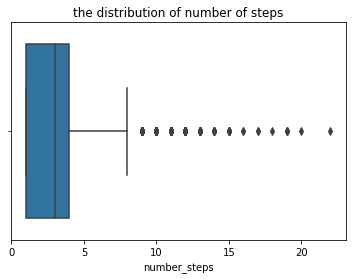

In [21]:
sns.boxplot(ck['number_steps']).set_title('the distribution of number of steps')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'the distribution of number of ingredients')

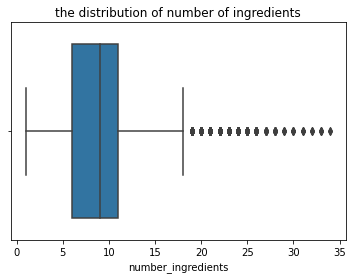

In [22]:
sns.boxplot(ck['number_ingredients']).set_title('the distribution of number of ingredients')

In [140]:
ck['prep_time']=ck['prep_time'].apply(pd.to_numeric,errors='coerce')


In [119]:
ck["cook_time"]=ck["cooking_directions"].apply(lambda x:x[3:4])

In [120]:
ck['cook_time']=ck["cook_time"].str[0]

In [201]:
ck.sort_values(by=["cook_time"])

TypeError: '<' not supported between instances of 'int' and 'str'

In [127]:
ck['cook_time']=ck['cook_time'].fillna(-1)

In [128]:
mask=ck['cook_time'].str.contains('h')

In [157]:
ck_filt=ck.loc[ck.cook_time.str.contains("m", na=False)]


In [158]:
#str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [170]:
ck2=ck.dropna(axis='index',how='any', subset=['prep_time'])

In [196]:
ck_filt=ck2.loc[ck2.cook_time.str.contains("h", na=False)]
ck_filt_m=ck2.loc[ck2.cook_time.str.contains('m',na=False)]
ck_filt_m['cook_time']=ck_filt_m.cook_time.str.replace('m','')

/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/3098534275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ck_filt_m['cook_time']=ck_filt_m.cook_time.str.replace('m','')


In [198]:
ck_filt_m['cook_time'].loc[ck_filt_m.cook_time.str.contains('h',na=False)].str.split('h').apply(lambda x: int(x[0]) * 60 + int(x[1]))

ValueError: invalid literal for int() with base 10: 'Heat 2 teaspoons oil in large nonstick skillet over ediu-'

In [229]:
df3

,recipe_id,recipe_name,image_url,ingredients,cooking_directions,nutritions,prep_time,cook_time,total_time
0,240488,"Pork Loin, Apples, and Sauerkraut",https://images.media-allrecipes.com/userphotos...,sauerkraut drained^Granny Smith apples sliced^...,"['directions': u'Prep, 15 m, Cook, 2 h 30 m, R...","{u'niacin': {u'hasCompleteData': False, u'name...",15 m,2 h 30 m,[2 h 45 m]
1,218939,Foolproof Rosemary Chicken Wings,https://images.media-allrecipes.com/userphotos...,chicken wings^sprigs rosemary^head garlic^oliv...,"['directions': u""Prep, 20 m, Cook, 40 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20 m,40 m,[1 h]
2,87211,Chicken Pesto Paninis,https://images.media-allrecipes.com/userphotos...,focaccia bread quartered^prepared basil pesto^...,"['directions': u'Prep, 15 m, Cook, 5 m, Ready ...","{u'niacin': {u'hasCompleteData': True, u'name'...",15 m,5 m,[20 m]
3,245714,Potato Bacon Pizza,https://images.media-allrecipes.com/userphotos...,red potatoes^strips bacon^Sauce:^heavy whippin...,"['directions': u'Prep, 20 m, Cook, 45 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20 m,45 m,[1 h 10 m]
4,218545,Latin-Inspired Spicy Cream Chicken Stew,https://images.media-allrecipes.com/userphotos...,skinless boneless chicken breast halves^diced ...,"['directions': u'Prep, 10 m, Cook, 8 h 15 m, R...","{u'niacin': {u'hasCompleteData': False, u'name...",10 m,8 h 15 m,[8 h 25 m]
...,...,...,...,...,...,...,...,...,...
45625,222886,Grateful Dead Cocktail,https://images.media-allrecipes.com/userphotos...,fluid ounce tequila^fluid ounce vodka^fluid ou...,"['directions': u'Prep, 5 m, Ready In, 5 m, Com...","{u'niacin': {u'hasCompleteData': False, u'name...",5 m,5 m,[]
45626,25650,Cheese Filling For Pastries,https://images.media-allrecipes.com/userphotos...,raisins^brandy^cream cheese^white sugar^all-pu...,"['directions': u'Prep, 15 m, Ready In, 15 m, S...","{u'niacin': {u'hasCompleteData': True, u'name'...",15 m,15 m,"[In a bowl, cream together cream cheese and su..."
45627,23544,Peach Smoothie,https://images.media-allrecipes.com/userphotos...,sliced peaches drained^scoops vanilla ice crea...,"['directions': u'Prep, 1 m, Ready In, 1 m, In ...","{u'niacin': {u'hasCompleteData': False, u'name...",1 m,1 m,[]
45628,170710,Double Dare Peaches,https://images.media-allrecipes.com/userphotos...,butter^habanero peppers^fresh peaches^brown su...,"['directions': u'Prep, 20 m, Cook, 10 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20 m,10 m,[30 m]


In [236]:
df3['prep_time']=df3['prep_time'].apply(pd.to_numeric,errors='coerce')

/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/958468801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prep_time']=df3['prep_time'].apply(pd.to_numeric,errors='coerce')


In [280]:
df3

,recipe_id,recipe_name,image_url,ingredients,cooking_directions,nutritions,prep_time,cook_time,total_time
0,240488,"Pork Loin, Apples, and Sauerkraut",https://images.media-allrecipes.com/userphotos...,sauerkraut drained^Granny Smith apples sliced^...,"['directions': u'Prep, 15 m, Cook, 2 h 30 m, R...","{u'niacin': {u'hasCompleteData': False, u'name...",15.0,[2 h 30 m],[2 h 45 m]
1,218939,Foolproof Rosemary Chicken Wings,https://images.media-allrecipes.com/userphotos...,chicken wings^sprigs rosemary^head garlic^oliv...,"['directions': u""Prep, 20 m, Cook, 40 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20.0,[40 m],[1 h]
2,87211,Chicken Pesto Paninis,https://images.media-allrecipes.com/userphotos...,focaccia bread quartered^prepared basil pesto^...,"['directions': u'Prep, 15 m, Cook, 5 m, Ready ...","{u'niacin': {u'hasCompleteData': True, u'name'...",15.0,[5 m],[20 m]
3,245714,Potato Bacon Pizza,https://images.media-allrecipes.com/userphotos...,red potatoes^strips bacon^Sauce:^heavy whippin...,"['directions': u'Prep, 20 m, Cook, 45 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20.0,[45 m],[1 h 10 m]
4,218545,Latin-Inspired Spicy Cream Chicken Stew,https://images.media-allrecipes.com/userphotos...,skinless boneless chicken breast halves^diced ...,"['directions': u'Prep, 10 m, Cook, 8 h 15 m, R...","{u'niacin': {u'hasCompleteData': False, u'name...",10.0,[8 h 15 m],[8 h 25 m]
...,...,...,...,...,...,...,...,...,...
45625,222886,Grateful Dead Cocktail,https://images.media-allrecipes.com/userphotos...,fluid ounce tequila^fluid ounce vodka^fluid ou...,"['directions': u'Prep, 5 m, Ready In, 5 m, Com...","{u'niacin': {u'hasCompleteData': False, u'name...",5.0,[5 m],[]
45626,25650,Cheese Filling For Pastries,https://images.media-allrecipes.com/userphotos...,raisins^brandy^cream cheese^white sugar^all-pu...,"['directions': u'Prep, 15 m, Ready In, 15 m, S...","{u'niacin': {u'hasCompleteData': True, u'name'...",15.0,[15 m],"[In a bowl, cream together cream cheese and su..."
45627,23544,Peach Smoothie,https://images.media-allrecipes.com/userphotos...,sliced peaches drained^scoops vanilla ice crea...,"['directions': u'Prep, 1 m, Ready In, 1 m, In ...","{u'niacin': {u'hasCompleteData': False, u'name...",1.0,[1 m],[]
45628,170710,Double Dare Peaches,https://images.media-allrecipes.com/userphotos...,butter^habanero peppers^fresh peaches^brown su...,"['directions': u'Prep, 20 m, Cook, 10 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20.0,[10 m],[30 m]


In [251]:
df3['prep_time']=df3['prep_time'].str[0].str.replace('m','').astype(float)

ValueError: could not convert string to float: 'A'

In [252]:
df3['prep_time']=df3['prep_time'].apply(pd.to_numeric,errors='coerce')

/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/958468801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prep_time']=df3['prep_time'].apply(pd.to_numeric,errors='coerce')


In [253]:
df3['cook_time']

,recipe_id,recipe_name,image_url,ingredients,cooking_directions,nutritions,prep_time,cook_time,total_time
0,240488,"Pork Loin, Apples, and Sauerkraut",https://images.media-allrecipes.com/userphotos...,sauerkraut drained^Granny Smith apples sliced^...,"['directions': u'Prep, 15 m, Cook, 2 h 30 m, R...","{u'niacin': {u'hasCompleteData': False, u'name...",15.0,[2 h 30 m],[2 h 45 m]
1,218939,Foolproof Rosemary Chicken Wings,https://images.media-allrecipes.com/userphotos...,chicken wings^sprigs rosemary^head garlic^oliv...,"['directions': u""Prep, 20 m, Cook, 40 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20.0,[40 m],[1 h]
2,87211,Chicken Pesto Paninis,https://images.media-allrecipes.com/userphotos...,focaccia bread quartered^prepared basil pesto^...,"['directions': u'Prep, 15 m, Cook, 5 m, Ready ...","{u'niacin': {u'hasCompleteData': True, u'name'...",15.0,[5 m],[20 m]
3,245714,Potato Bacon Pizza,https://images.media-allrecipes.com/userphotos...,red potatoes^strips bacon^Sauce:^heavy whippin...,"['directions': u'Prep, 20 m, Cook, 45 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20.0,[45 m],[1 h 10 m]
4,218545,Latin-Inspired Spicy Cream Chicken Stew,https://images.media-allrecipes.com/userphotos...,skinless boneless chicken breast halves^diced ...,"['directions': u'Prep, 10 m, Cook, 8 h 15 m, R...","{u'niacin': {u'hasCompleteData': False, u'name...",10.0,[8 h 15 m],[8 h 25 m]
...,...,...,...,...,...,...,...,...,...
45625,222886,Grateful Dead Cocktail,https://images.media-allrecipes.com/userphotos...,fluid ounce tequila^fluid ounce vodka^fluid ou...,"['directions': u'Prep, 5 m, Ready In, 5 m, Com...","{u'niacin': {u'hasCompleteData': False, u'name...",5.0,[5 m],[]
45626,25650,Cheese Filling For Pastries,https://images.media-allrecipes.com/userphotos...,raisins^brandy^cream cheese^white sugar^all-pu...,"['directions': u'Prep, 15 m, Ready In, 15 m, S...","{u'niacin': {u'hasCompleteData': True, u'name'...",15.0,[15 m],"[In a bowl, cream together cream cheese and su..."
45627,23544,Peach Smoothie,https://images.media-allrecipes.com/userphotos...,sliced peaches drained^scoops vanilla ice crea...,"['directions': u'Prep, 1 m, Ready In, 1 m, In ...","{u'niacin': {u'hasCompleteData': False, u'name...",1.0,[1 m],[]
45628,170710,Double Dare Peaches,https://images.media-allrecipes.com/userphotos...,butter^habanero peppers^fresh peaches^brown su...,"['directions': u'Prep, 20 m, Cook, 10 m, Ready...","{u'niacin': {u'hasCompleteData': True, u'name'...",20.0,[10 m],[30 m]


In [282]:
df4=df3.loc[df3.cook_time.str[0].str.contains('h','m',na=False)]

In [312]:
df4['cook_time'].str.contains('m')

0         True
4         True
12       False
14       False
15       False
         ...  
45581     True
45589     True
45593     True
45604     True
45623     True
Name: cook_time, Length: 8857, dtype: bool

In [322]:
df3["cook_time"]=df3['cook_time'].str.replace('m','')

/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/2391184863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["cook_time"]=df3['cook_time'].str.replace('m','')


In [325]:
import re

In [342]:
df4['cook_time_hour']=df4['cook_time_hour'].apply(pd.to_numeric,errors='coerce')

/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/126753282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['cook_time_hour']=df4['cook_time_hour'].apply(pd.to_numeric,errors='coerce')


In [345]:
df4["cook_time_hour"]=df4['cook_time_hour'].apply(lambda x: x*60)

/var/folders/4k/c6fnhvtd25379x2gsf85hpp80000gn/T/ipykernel_39179/87819649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["cook_time_hour"]=df4['cook_time_hour'].apply(lambda x: x*60)


In [346]:
df4

,recipe_id,recipe_name,image_url,ingredients,cooking_directions,nutritions,prep_time,cook_time,total_time,cook_time_hour
0,240488,"Pork Loin, Apples, and Sauerkraut",https://images.media-allrecipes.com/userphotos...,sauerkraut drained^Granny Smith apples sliced^...,"['directions': u'Prep, 15 m, Cook, 2 h 30 m, R...","{u'niacin': {u'hasCompleteData': False, u'name...",15.0,NaN,[2 h 45 m],120.0
4,218545,Latin-Inspired Spicy Cream Chicken Stew,https://images.media-allrecipes.com/userphotos...,skinless boneless chicken breast halves^diced ...,"['directions': u'Prep, 10 m, Cook, 8 h 15 m, R...","{u'niacin': {u'hasCompleteData': False, u'name...",10.0,NaN,[8 h 25 m],480.0
12,103305,Hearty Chili,https://images.media-allrecipes.com/userphotos...,ground beef^chopped onions^garlic cloves^tomat...,"['directions': u'Prep, 10 m, Cook, 1 h, Ready ...","{u'niacin': {u'hasCompleteData': False, u'name...",10.0,NaN,[1 h 10 m],60.0
14,185816,Sweet Pork for Burritos,https://images.media-allrecipes.com/userphotos...,pork shoulder roast^salsa^fluid ounce) can^bro...,"['directions': u'Prep, 30 m, Cook, 8 h, Ready ...","{u'niacin': {u'hasCompleteData': False, u'name...",30.0,NaN,[8 h 30 m],480.0
15,79814,Slow Cooker Veggie-Beef Soup with Okra,https://images.media-allrecipes.com/userphotos...,ground beef^onion^diced tomatoes drained^Itali...,"['directions': u'Prep, 20 m, Cook, 4 h, Ready ...","{u'niacin': {u'hasCompleteData': False, u'name...",20.0,NaN,[4 h 20 m],240.0
...,...,...,...,...,...,...,...,...,...,...
45581,114448,Cold-Pickled Green Beans,https://images.media-allrecipes.com/userphotos...,tarragon vinegar^water^canning jars with lids ...,"['directions': u'Prep, 20 m, Ready In, 8 h 20 ...","{u'niacin': {u'hasCompleteData': False, u'name...",20.0,NaN,[Pack each jar with green beans so they stand ...,480.0
45589,258807,Vegan Dilly Ranch,https://images.media-allrecipes.com/userphotos...,cashew milk^raw cashews^fresh lemon juice^chia...,"['directions': u'Prep, 5 m, Ready In, 1 h 5 m,...","{u'niacin': {u'hasCompleteData': False, u'name...",5.0,NaN,"[Refrigerate until well chilled, at least 1 ho...",60.0
45593,230350,Coffee Slush,https://images.media-allrecipes.com/userphotos...,pints half-and-half cream^cold brewed coffee^w...,"['directions': u'Prep, 10 m, Ready In, 4 h 10 ...","{u'niacin': {u'hasCompleteData': True, u'name'...",10.0,NaN,[Remove container from freezer and defrost in ...,240.0
45604,78218,Citrus-Basil Vinaigrette,https://images.media-allrecipes.com/userphotos...,olive oil^orange juice^lemon juice^lemon zeste...,"['directions': u'Prep, 10 m, Ready In, 2 h 10 ...","{u'niacin': {u'hasCompleteData': False, u'name...",10.0,NaN,[],120.0
